In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm


In [2]:
'''数据设定'''
np.random.seed(123)
n = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=n)

X = np.array([np.random.normal(i, j, n) for i, j in zip([10,2], [1,1.5])])
X_mean = X.mean(axis=1, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(beta_real, X) + eps_real


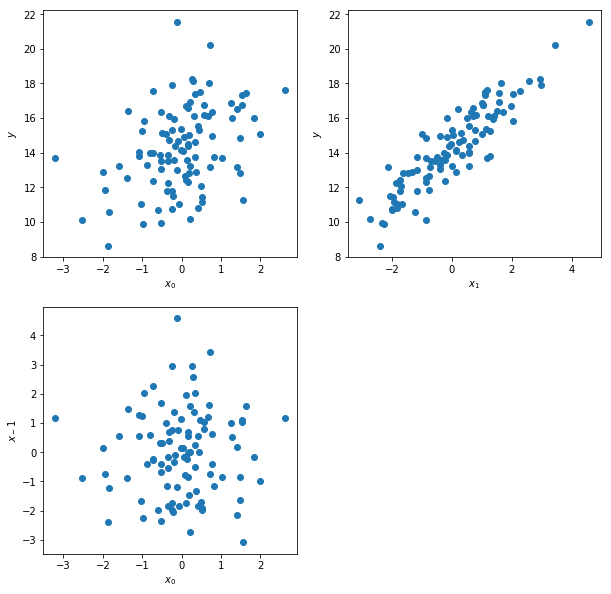

In [4]:
def aplot(x, y):
    plt.figure(figsize=(10, 10))
    #绘制两个自变量与y的关系
    for idx, x_i in enumerate(x):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel('$x_{}$'.format(idx))
        plt.ylabel('$y_{}$')
    #绘制两个自变量之间的关系
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[0], x[1])
    plt.xlabel('$x_{}$'.format(idx-1))
    plt.ylabel('$x_{}$'.format(idx-2))
    
aplot(X_centered, y)

C:\Users\Forry\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -94.593, ||grad|| = 16.015: 100%|█████████████████████████████████████████████| 39/39 [00:00<00:00, 1028.83it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha_tmp]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 11000/11000 [00:14<00:00, 749.32draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186724CFB00>,
      dtype=object)

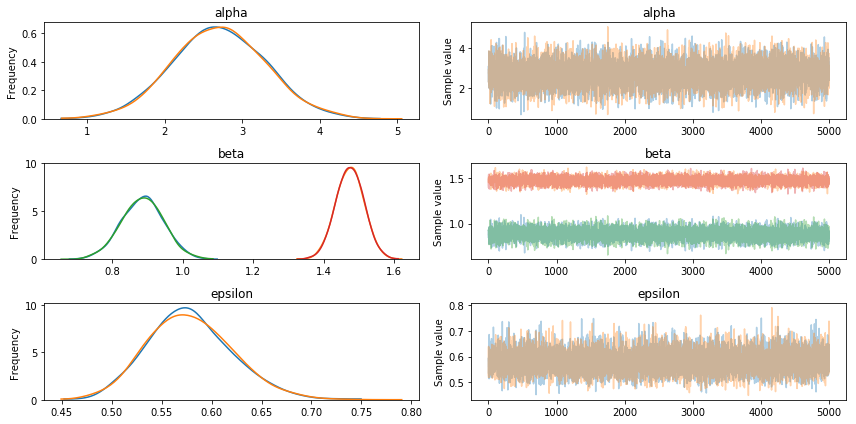

In [6]:
with pm.Model() as model_a:
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = alpha_tmp + pm.math.dot(beta, X_centered)
    
    alpha = pm.Deterministic('alpha', alpha_tmp - pm.math.dot(beta, X_mean))
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5000, step=step, start=start)

varnames = ['alpha', 'beta', 'epsilon']
pm.traceplot(trace, varnames)